<a href="https://colab.research.google.com/github/00150/Practice-anything..../blob/main/Project_used_car_modifying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚘**중고차 데이터 분석 및 시각화**🚘

>**1.연구 배경**
  
국내 중고차 시장 규모는 20조 ~ 25조원으로 추정됩니다.</br>
**한국자동차산업협회(KAMA)**가 발표한 **'2020년 국내 중고차 거래현황 분석 및 시사점' 보고서**에 따르면
  **2020년 한 해 동안 국내에서 거래된 중고차 대수**는 **약 251만 5000대**로, <u>**같은 기간 신차 판매량보다 
  약 1.32배 이상 높은 수치**</u>를 기록하였습니다. </br>
  
KAMA에서 발표한 보고서에 따르면 국내 중고차 시장에서 매매업자를 통한 거래보다 개인등 당사자 간의
  거래의 비중이 더 높은 것으로 나타나 **<u>중고차 매매업자에 대한 소비자 불신이 심각한 수준</u>**이라는 분석이 나왔습니다.
  
  - 당사자간의 거래 : 54.7%
  - 중고차 매매업자를 통한 거래 : 45.3% 
  
  
또한 지난 3월, 중소벤처기업부에 따르면 생계형 적합업종 심의위원회는 중고차 판매업을 생계형 적합업종으로 지정하지 않기로 의결하며 **완성차 대기업의 중고차 시장 진출이 가능**해졌습니다. </br>
  
   이는 완성차 대기업의 진출로 중고차 성능 및 상태 등등의 제품의 신뢰성이 확보되고, </br>소비자들에게 제품 구매에 관한 신뢰도를 높임으로써 **중고차 거래에서 더 나은 활력**을 불어줄 것입니다. </br>

**하지만** 큰 규모의 중고차 시장을 들여다보면</br> 
**중고차 중개인의 허위 매물 판매, 중고차의 성능 및 상태 조작 등등의  여러가지 사건 & 사고가 존재**합니다.

**이번 프로젝트를 통해 구매하고 싶은 차의 종류 및 상태의 적정 가격을 알 수 있다면,**</br> 
<u>**매매업자 및 당사자간의 거래에서 원활한 거래를 진행할 수 있을 것 입니다.**</u>


 * 연구 배경 참조 URL
  - [URL 1](https://www.yna.co.kr/view/AKR20211025079400003)
  - [URL 2]((https://biz.chosun.com/industry/company/2022/03/17/7K2CGANW3BB7RFI5CWXIKWFUYA/))



>**2.연구 목적**

* 구매하고 싶은 차의 종류 및 적정 가격을 알 수 있다.
* 위 내용을 바탕으로 앞으로의 중고차의 거래에서 원활한 거래를 진행할 수 있다.



>**3.연구 방법**

* 자료 : [Kaggle 데이터 참조](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)

* 사용할 수 있는 방법 
 - 머신러닝 지도학습 : 회귀 & 결정트리
 - 데이터를 살펴보고 어떤 방법을 사용할 지 결정합니다.
 - 지도학습 회귀 & 결정트리는 알아보고자하는 target 이 어떠한 데이터 형태를 띄느냐에 따라 사용할 수 있는 방법이 다릅니다.
  
  - ex) 회귀 output : 연속형 변수</br>분류 output : 범주형 변수
  - 데이터를 살펴보고, 전처리 및 가공을 통해 올바른 방법으로 데이터를 분석을 진행하고자 합니다. 





❗  참고
* 필요한 라이브러리 및 패키지는 그때마다 가져와서 사용하도록 하겠습니다.


In [1]:
# 데이터 불러오기 (크롬)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np

# 전처리 작업 진행 도중 값의 앞 부분에 띄어쓰기가 들어가 있어 삭제합니다. 
# 파라미터: skipinitialspace=True 

# 아우디 
# 아우디
audi = pd.read_csv('/content/drive/MyDrive/project : used_car/audi.csv',skipinitialspace=True)


# 1. Audi 데이터 살펴보기.
> 외제차중 인기있는 브랜드 중 하나인 audi의 DATA를 살펴봅니다.



In [3]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


* 각각의 컬럼은 다음과 같습니다. 
  - model : 자동차의 모델명🏎
  - year : 연식 📅
  - price : 가격 💸
  - transmission : 변속기⚙
  - mileage : 자동차 주행거리🎛
  - fuelType : 자동차 연료의 유형⛽
  - tax : 세금(자동차)🧾
  - mpg(Miles per Gallon) : 연비(Fuel efficiency)🎭
  - engineSize :엔진 크기🦾

#### **1-2. EDA : Audi** 

In [4]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
# 숫자 타입 데이터 살펴보기.
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [7]:
# 문자열 데이터 타입 살펴보기.
audi.describe(exclude = np.number)

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


데이터의 결측치는 없는 상태입니다.
추가적으로 놓친 부분이 없는지 ```ProfileReport```를 이용하여 데이터를 확인합니다.


In [8]:
# 필요한 라이브러리 가져오기.
!pip install category_encoders
!pip install pandas-profiling==2.11.0 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 3.8 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.0 which is incompatible.


In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(audi, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

현재 데이터에서 중복되는 행이 존재하며, ```col : tax```에서는 zero 값이 존재하는 것을 알 수 있었습니다.

* 먼저 중복되는 값들을 확인해봅니다.

In [10]:
audi.duplicated().value_counts()

False    10565
True       103
dtype: int64

In [11]:
# 중복된 행을 찾기 위한 함수 생성.

True_list = []

def check_duplicate(data):

  # 중복값 확인
  bool_index = audi.duplicated()
  
  for index,values in enumerate(bool_index):
    if values == True :
      True_list.append(index)
  
  return None    

In [12]:
# 정의한 함수 실행 : check_duplicate
check_duplicate(audi)

In [13]:
len(True_list)

103

중복되는 값들은 ```ProfileReport```에서 보고된 개수와 일치합니다.
* 데이터의 개수가 그리 많지 않으니 중복된 데이터의 행을 살펴봅니다.

In [14]:
audi_dup_data = audi.loc[True_list]
audi_dup_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
273,Q3,2019,34485,Automatic,10,Diesel,145,47.1,2.0
764,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6
784,Q3,2015,13995,Manual,35446,Diesel,145,54.3,2.0
967,Q5,2019,31998,Semi-Auto,100,Petrol,145,33.2,2.0
990,Q2,2019,22495,Manual,1000,Diesel,145,49.6,1.6
...,...,...,...,...,...,...,...,...,...
9508,A4,2019,26990,Automatic,2250,Diesel,145,50.4,2.0
9521,Q3,2019,26990,Manual,10,Petrol,145,40.9,1.5
9529,Q5,2019,44990,Automatic,10,Diesel,145,36.2,2.0
9550,Q3,2019,29995,Manual,10,Petrol,145,39.8,1.5


중복된 값들만 포함된 df만 살펴보니 삭제하는게 큰 의미가 있을 것 같지 않습니다.

In [15]:
audi_dup_data.tax.value_counts()

145    90
20      4
150     3
125     2
0       2
200     1
30      1
Name: tax, dtype: int64

In [16]:
audi[audi['engineSize'] ==0].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,Q5,2019,44790,Automatic,5886,Petrol,135,117.7,0.0
7506,Q3,2019,32788,Automatic,1500,Diesel,145,47.1,0.0
7516,Q3,2020,29944,Manual,1500,Petrol,145,40.9,0.0
7517,Q3,2020,33333,Automatic,1500,Diesel,145,47.1,0.0
7518,Q3,2020,29944,Automatic,1500,Petrol,145,32.5,0.0


엔진의 값에서 '0'인 값들이 존재합니다.
```engineSize : 0```이라면 엔진이 없다고 느낄 수 있으므로 잘못된 관측치인 것 같습니다.

* 다행스럽게도 자동차 모델의 세세한 옵션을 제외하곤 모두 규격화되어 있으므로
  같은 종류의 자동차의 엔진크기를 입혀도 될 것 같습니다.

* 먼저 자동차모델 및 연료타입에 따른 엔진사이즈만 따로 확인해보도록 합니다.

In [17]:
# 자동차 모델 및 연료타입 및 연료사이즈
extraction_audi = audi.loc[:,['model','fuelType','engineSize']]
extraction_audi.head()

,model,fuelType,engineSize
0,A1,Petrol,1.4
1,A6,Diesel,2.0
2,A1,Petrol,1.4
3,A4,Diesel,2.0
4,A3,Petrol,1.0


In [18]:
groupby_audi = extraction_audi.set_index(["model", "fuelType"])[["engineSize"]]
groupby_audi

engineSize
model fuelType            
A1    Petrol           1.4
A6    Diesel           2.0
A1    Petrol           1.4
A4    Diesel           2.0
A3    Petrol           1.0
...                    ...
      Petrol           1.0
      Petrol           1.0
      Petrol           1.0
Q3    Petrol           1.4
      Petrol           1.4

[10668 rows x 1 columns]

In [19]:
# A3에 대해서만 확인합니다.
A3_engineSize = groupby_audi.loc[['A3',],:]
A3_engineSize.head()

engineSize
model fuelType            
A3    Petrol           1.0
      Petrol           1.4
      Petrol           1.4
      Petrol           1.4
      Petrol           1.4

연료타입이 같음에도 불구하고 엔진사이즈가 다른 경우가 존재합니다. </br>
혹시 연료타입이 아닌 다른 결과가 엔진사이즈에 영향을 미칠 수 도 있을 것 같습니다. <br/>

```transmission```과 함께 확인하여 봅니다.


In [20]:
groupby_audi = audi.set_index(["model", "year", "transmission", "fuelType"])[["engineSize"]].sort_values(by='year')

In [21]:
## row 생략 없이 출력
#pd.set_option('display.max_rows', None)

## col 생략 없이 출력
#pd.set_option('display.max_columns', None)

groupby_audi = groupby_audi.loc[['A3',],:]
groupby_audi

engineSize
model year transmission fuelType            
A3    1998 Automatic    Petrol           1.8
      2003 Automatic    Diesel           1.9
      2004 Automatic    Petrol           1.6
      2005 Manual       Petrol           2.0
                        Petrol           1.6
...                                      ...
      2020 Semi-Auto    Hybrid           1.4
           Manual       Diesel           1.6
                        Diesel           2.0
                        Petrol           1.5
                        Diesel           1.6

[1929 rows x 1 columns]

#### 별다른 특이점을 찾지 못하였습니다❗
* 같은 연도에서 ```fuelType```, ```transmission```을 살펴보았으나, 세 가지 모두 같음에도 엔진의 값이 다른 경우가 존재합니다. 

  - 즉 이들 값으로 엔진의 값을 채우는 것은 무리가 있어보이므로, ```engineSize```가 '0' 으로 되어있는 값은 삭제하도록 하겠습니다. 

####1-2-1.```engineSize```가 0인 행을 삭제하도록 합니다.

In [22]:
# engineSize = 0인 행만 따로 추출
engineSize_0 = audi[audi['engineSize'] == 0]

print(f'엔진 사이즈가 0인 경우 :{engineSize_0.shape}')

# 제거하기 전 audi : df크기
print(f'제거하기 전 df 크기 : {audi.shape}')

# table drop
# 엔진 사이즈가 0인 값들은 모두 제거합니다.
audi = audi[audi['engineSize'] !=0]


# 제거 이후 audi : df크기
print(f'제거이후 df 크기 : {audi.shape}')

엔진 사이즈가 0인 경우 :(57, 9)
제거하기 전 df 크기 : (10668, 9)
제거이후 df 크기 : (10611, 9)


#### 1-2-2. year 제거.
>현재 날짜를 기준으로 보았을 때, 90년대 및 2000년대 중고차 차량은 매력이 없는 상품일 것 입니다.

* 차의 연식이 오래될수록, 비교적 차량의 관리가 어렵고, 사고 또한 존재할 위험이 있으며, 주행거리 또한 높을 확률이 통념상 높습니다.

* 차량의 기준점은 2014년으로 잡도록 하겠습니다. 
  - 2014년 이전의 생산차량은 모두 제거하도록 합니다.
  


In [23]:
# 날짜 컬럼만 살펴봅시다.
audi['year'].sort_values() # 1998년도 차량이 존재합니다.
identify_year = audi[audi['year'] < 2014]

# 2014년 미만의 데이터 확인
print(f'2014년 미만의 차량의 개수는 총 {identify_year.shape[0]}대 입니다.')
print(f'제거 전의 데이터 크기는 총 {audi.shape[0]}입니다.')
audi = audi[audi['year'] > 2013]
print(f'제거 후의 데이터 크기는 총 {audi.shape[0]}입니다.')

2014년 미만의 차량의 개수는 총 545대 입니다.
제거 전의 데이터 크기는 총 10611입니다.
제거 후의 데이터 크기는 총 10066입니다.


####1-2-3. EDA : IQR Method 💡
> 데이터 내에서 이상치를 탐지하는 강력한 방법중 하나로
  데이터를 정제하기 위해 IQR Method로 데이터를 탐색합니다.

* 이상치 : 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값 & 큰 값
* 시각화 : 이상치를 눈에 볼 수 있게끔 시각화 또한 포함합니다.

 **❗주의 :  <u>몇가지 컬럼에 대하여는 IQR Method를 실행하지 않겠습니다</u>❗**
* ```차량 연비 : mpg``` 같은 경우, 비싼 스포츠카 및 고급 외제차는 많은 연비가 나올 수 있습니다.
* ``` 가격 : price ``` 와 같은 경우, 비싼 스포츠카 및 고급 외제차는 '감가' 또한 적게 이루어질 수 있습니다.  

#### ```mileage```에 대하여 이상치 컬럼을 확인합니다. 
중고차를 구매할 때 많은 주행거리는 상대적으로 매력이 있지 않습니다. </br>
따라서 이상치로 판단하여, 너무 많은 주행거리는 삭제하겠습니다.

In [24]:
# 이상치를 탐지 하기 위해 함수를 정의합니다. : IQR Method 

#  필요한 라이브러리를 가져옵니다.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def outlier_iqr(data, column):
  
  
  boxplot_column = sns.boxplot(x = column, data =data)
  plt.title(f'Outlier Data : {column}')
  plt.show()
  
  # 글로벌 변수 선언
  global lower, upper, data1, data2, data_cleaning

  # 분위수 기준 정하기.
  q1, q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

  # iqr 계산.
  iqr = q3 - q1

  # 이상치 : outlier cutoff 계산
  cut_off = iqr*1.5

  # lower, upper bound 값 구하기.
  lower, upper = q1 - cut_off, q3 + cut_off

  # identify...
  print(f'IQR은 {iqr} 이다.')
  print(f'lower bound 값은 {lower} 이다.')
  print(f'upper bound 값은 {upper} 이다.')

  # 1사분위 및 4사분위에 속해있는 데이터 저장. 
  data1 = data[data[column] > upper]
  data2 = data[data[column] < lower]

  # 이상치 개수 구하기.
  print(f'총 이상치 개수는 {data1.shape[0] + data2.shape[0]}이다.')

  # 제거전 데이터의 크기.
  print(f'제거 전 데이터 크기 {data.shape}')
  # 이상치 제거
  data_cleaning = data[(data[column]<upper) & (data[column] > lower)]
  
  print(f'제거 이후 데이터 크기{data_cleaning.shape}')

  return data_cleaning

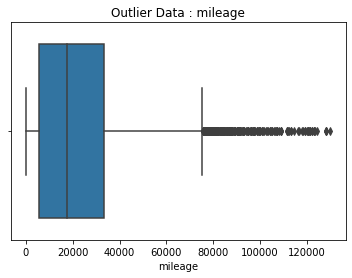

IQR은 27947.25 이다.
lower bound 값은 -36361.125 이다.
upper bound 값은 75427.875 이다.
총 이상치 개수는 259이다.
제거 전 데이터 크기 (10066, 9)
제거 이후 데이터 크기(9807, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [25]:
outlier_iqr(audi, 'mileage')

In [26]:
audi = data_cleaning
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [27]:
# 시각화 라이브러리 한글 깨짐 현상 방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [28]:
# 정제된 데이터를  outlier_iqr이 적용된 데이터에 덮어씌웁니다.
audi = data_cleaning
audi.shape

(9807, 9)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

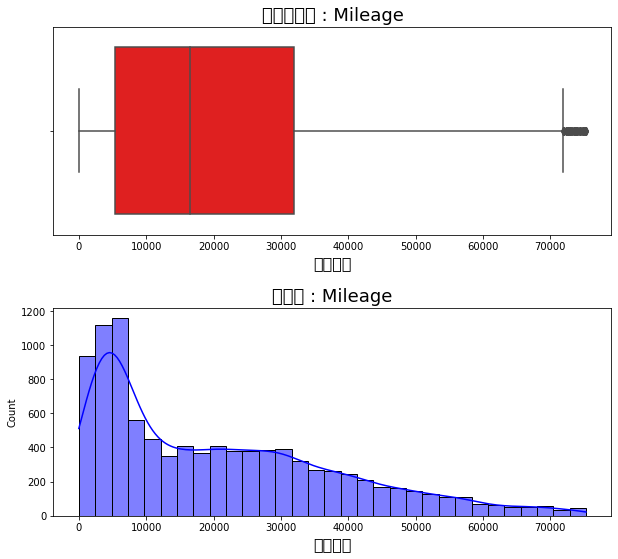

In [29]:
# 런타임 재시작 및 실행 이후 이 코드셀을 다시 한 번 실행하면 한글 출력 원활하게 나옴.

# 박스플롯으로 다시 한 번 확인하여 봅시다.
fig, axes = plt.subplots(2,1, figsize = (10,9))
sns.boxplot(data= audi, x = 'mileage', color = 'red', ax = axes[0])
sns.histplot(data = audi, x = 'mileage', kde = True, color = 'blue', ax=axes[1])

# subplots 간격조절.
plt.subplots_adjust(hspace = 0.35)


# 한글깨짐 방지 폰트 지정 matplotlib.
plt.rc('font', family='NanumBarunGothic') 
plt.title('Audi 차량의 마일리지')

# 제목 생성
axes[0].set_title("박스그래프 : Mileage", fontsize = 18)
axes[1].set_title("분포도 : Mileage", fontsize = 18) 

axes[0].set_xlabel('주행거리', fontsize=16)
axes[1].set_xlabel('주행거리', fontsize=16)
plt.show()

In [30]:
audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

###1-2-4. 이번에는 연비를 살펴봅시다.
* 살펴본 결과, 0의 연비를 가지고 있는 자동차는 현재 데이터에서 존재하지 않습니다.

In [31]:
audi['mpg'].sort_values(ascending = True)

4783      21.1
2255      21.1
10468     21.4
4742      21.4
5459      21.4
         ...  
4261     188.3
4493     188.3
3106     188.3
10392    188.3
4879     188.3
Name: mpg, Length: 9807, dtype: float64

이번에는 tax에 대하여 살펴보도록 합니다.


In [32]:
audi['tax'].sort_values()

7592       0
8795       0
2972       0
9847       0
2993       0
        ... 
9868     570
7689     570
10455    570
4976     570
7475     580
Name: tax, Length: 9807, dtype: int64

* 차량의 종류에 따라 세금은 다를 수 있습니다. 
  - 하지만 세금이 0인 경우는 어째서 0인지 잘 모르겠습니다.</br>
    현재 데이터에서 세금이 0인 경우는 어째서 세금이 0인지 살펴볼 수 없으므로,
    삭제하도록 하겠습니다.

In [33]:
# 현재 세금이 0인 경우에 해당하는 차량은 총 462대 입니다.
# 현재  audi데이터의 shape은 (9807,9) 이므로  세금이 0인 차량을 제외한다면  9,345가 되어야 합니다.
audi[audi['tax'] == 0].shape
audi = audi[audi['tax']>0]
audi.shape

(9345, 9)

#### 현재 ```col : year, engineSize, mileage, mpg, tax```에 까지 데이터를 살펴봤습니다.
나머지 컬럼은 범주형 변수 및 문제점이 없는데이터라고 생각하여 분석을 진행하도록 하겠습니다.

#### 1-3. Features Engineering
> 정제된 데이터에 추가로 알아보고 싶은 것들을 작성합니다. <br>

* 차량의 타입으로 자동차를 고를 분들도 존재할 것 같아, 차량의 타입을 작성했습니다. 
  - ex) sedan, suv, hatchback...

* 이외에 다양한 아이디어로 작성할 수 있습니다.

> 다음과 같은 컬럼을 추가하였습니다.

* ```'size_and_type'``` : size & type을 나타내는 컬럼 생성.</br> 
  <sub>이후 ```size```와 ```type```을 나눠 추가 생성하였습니다.</sub>

* ```used_year``` : 차를 사용한 연도를 알아보기 쉽게 하기 위해 표기하였습니다.</br>
<sub> 기준은 2022년이며, 단위는 (년) 입니다.</sub>

* ```ampy``` : 연간 평균 주행거리를 의미합니다. 
</br><sub>Average_mileage_per_year </sub>

* ```km/l``` : 자동차 연비를 한국식으로 표현했습니다.
<sub> ```mpg```보다는 가독성이 더 좋을 것 같습니다...</sub>

In [34]:
def engineering_audi(data):

  # 적용되어야 할 df의 모든 속성 가져오기.
  selected_cols = data.select_dtypes(include = ['number','object'])

  # size & type을 나타내는 컬럼 생성.
  data['size_and_type'] = data['model']

  # 생성된 컬럼의 값을 대체합니다.
  data.replace({'size_and_type' : {'A1':'small_hatchback',
                                   'A2':'small_hatchback',
                                   'A3':'submid_hatchback',
                                   'A4':'mid_sedan',
                                   'A5':'mid_coupe',
                                   'A6':'subfull_sedan',
                                   'A7':'subfull_coupe', 
                                   'A8':'full_sedan',
                                    
                                   'Q2':'small_suv',
                                   'Q3':'submid_suv',
                                   'Q5':'mid_suv',
                                   'Q7':'subfull_suv',
                                   'Q8':'subfull_suv',
                                    
                                   'S3':'submid_hatchback',
                                   'S4':'mid_sedan',
                                   'S5':'mid_coupe',
                                   'S8':'full_sedan',
                                    
                                   'SQ5':'mid_suv',
                                   'SQ7':'subfull_suv',
                                    
                                   'RS3':'submid_hatchback',
                                   'RS4':'mid_sedan',
                                   'RS5':'mid_coupe',
                                   'RS6':'subfull_wagon',

                                   'TT':'small_sportscoupe',
                                   'R8': 'mid_sportscoupe'}}, inplace = True)
  

  # size & type 생성.
  data['size'] = data['size_and_type'].str.split('_').str[0]
  
  data['type'] = data['size_and_type'].str.split('_').str[1]
  
  # 사용한 날짜(단위 : 년) 생성 / 기준년도 2022년
  data['used_year'] = (2022 - data['year']) + 1
 
  # 연간 평균 주행거리 :Average_mileage_per_year
  data['ampy'] = (data['mileage'] / data['used_year']).round(1)
  
  # 자동차 연비 : mpg라서 한국식으로 좀 바꿔봅시다.
  # 1mpg : 0.43km/L 을 기준으로 잡아서 계산하였습니다. 
  data['km/l'] = (data['mpg'] * 0.43).round(1)


  return audi

In [35]:
engineering_audi(audi).head()

<ipython-input-34-40085a3e5ba7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['size_and_type'] = data['model']
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-34-40085a3e5ba7>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,size_and_type,size,type,used_year,ampy,km/l
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,small_hatchback,small,hatchback,6,2622.5,23.8
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,subfull_sedan,subfull,sedan,7,5171.9,27.6
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,small_hatchback,small,hatchback,7,4278.0,23.8
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,mid_sedan,mid,sedan,6,4325.3,28.9
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,submid_hatchback,submid,hatchback,4,499.5,21.3


In [36]:
# 최종적으로 생성된 데이터를 한번 확인하여 봅시다.
audi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 10667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          9345 non-null   object 
 1   year           9345 non-null   int64  
 2   price          9345 non-null   int64  
 3   transmission   9345 non-null   object 
 4   mileage        9345 non-null   int64  
 5   fuelType       9345 non-null   object 
 6   tax            9345 non-null   int64  
 7   mpg            9345 non-null   float64
 8   engineSize     9345 non-null   float64
 9   size_and_type  9345 non-null   object 
 10  size           9345 non-null   object 
 11  type           9344 non-null   object 
 12  used_year      9345 non-null   int64  
 13  ampy           9345 non-null   float64
 14  km/l           9345 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1+ MB


# **2. Data Visualization🙇🏻‍♂️**
> 현재 데이터에서 살펴볼 수 있는 것을 살펴보고자 합니다.

In [37]:
# 호버기능을 이용할 수 있는 plotly 사용
!pip install plotly
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 2-1. 모델별 차량의 개수

In [38]:
# 필요한 라이브러리를 가져옵니다.
import plotly.express as px
import plotly.graph_objs as go

# 모델에 따른 개수를 확인합니다.
audi_counts = audi.groupby('model')['model'].count().reset_index(name ='counts').sort_values(by='counts')

# 시각화에 들어갈 색상 생성
sns.set_palette("Set2")  

# 시각화
fig = px.bar(audi_counts,
             x = 'counts',
             y= 'model',
             text_auto = 'Count',
             color = audi_counts['model'])


# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 모델별 차량의 개수</b><br><sup> Count of Model "Audi"</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>종류별 개수</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>모델 종류</b>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)


#2. 추가설정
fig.update_traces(
    
    # 막대 오른쪽 글자 표시 : 크기.
    textfont_size = 15,

    #
    textposition = 'outside',
    
    # 막대크기
    width = 1,
    
    # 막대 주변 
    marker_line_width=0.5,
    marker_line_color = 'black'
)


fig.show()


####2-2. 아우디 자동차별 평균 가격에 대한 시각화
> 평균가격에서 소수점 반올림을 진행합니다.

* 차량의 개수가 가장많은 A3는 두번째로 가장 싼 평균가격을 차지하고 있습니다.
* 아우디 :R8의 중고차 매물은 24대뿐이지만, 가장 비싼 평균금액대를 형성하고 있습니다.


In [39]:
#자동차별 평균 금액 묶기.
price_model = audi.groupby('model')['price'].mean().reset_index(name = 'prices').sort_values(by='prices')

# 반올림
price_model['prices'] = price_model['prices'].round()

# 영국의 차량을 나타내는 데이터이므로 '파운드 -> 원' 으로 바꿔줍니다.
price_model['prices'] = price_model['prices'] * 1600


# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")

# 시각화
fig = px.bar(price_model,
             x = 'prices',
             y = 'model',
             text_auto = True,
             color = price_model['model'])



# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 모델별 평균 금액</b><br><sup> Average amount of Model "Audi"</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>평균 금액</b><br><sup>단위:원화</sup>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>모델 종류</b>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)

# 2-1. 가장 싼 차량
fig.add_annotation(
    text = '가장 싼 차량 : A1', 
    y = 24,
    showarrow = False,
    xshift = 60
)


# 2-2. 금액 중앙값.
fig.add_annotation(
    text = ' "다양한 모델" 중 중앙 값 : SQ5',
    y = 12,
    showarrow = False,
    xshift = 110
)


# 2-3. 가장 비싼 차량
fig.add_annotation(
    text = '가장 비싼 금액의 차량 :R8',
    y = 0,
    showarrow = False,
    xshift = 100
)


#3. 추가설정
fig.update_traces(
    
    # 막대 오른쪽 글자 표시 : 크기.
    textfont_size = 15,

    #
    textposition = 'outside',
    
    # 막대크기
    width = 1,
    
    # 막대 주변 
    marker_line_width=0.5,
    marker_line_color = 'black'
)

fig.show()

####2-3. 차량 타입에 따른 개수 확인.
> 모델 이름은 모르지만, 자동차의 타입(해치백,suv...)을 알고 있다면 확인할 수 있습니다.

* suv 타입의 자동차가 현재 중고차 시장에 가장 많은 매물을 형성하고 있는 것을 확인할 수 있습니다.

In [40]:
types_counts = audi.groupby('type')['type'].count().reset_index(name = 'counts').sort_values(by='counts')
types_counts



# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")

# 시각화
fig = px.bar(types_counts,
             x = 'counts',
             y = 'type',
             text_auto = True,
             color = types_counts['type'])



# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 타입별 개수</b><br><sup> Number by vehicle type "Audi"</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>총 개수</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>타입 종류</b>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)


#3. 추가설정
fig.update_traces(
    
    # 막대 오른쪽 글자 표시 : 크기.
    textfont_size = 15,

    #
    textposition = 'outside',
    
    # 막대크기
    width = 1,
    
    # 막대 주변 
    marker_line_width=0.5,
    marker_line_color = 'black'
)

fig.show()



####2-4. 차량 모델에 따른 가격의 범위
* R8의 최소가격 및 최대가격이 가장많은 차이를 보여주는 것으로 나타났습니다.
  - RS7 & S5는 차량이 각각 1대뿐입니다.

In [41]:
fig = px.box(audi, 
             x = 'model', 
             # 파운드 -> 원
             y = audi['price'] * 1600,
             color = audi['model'])

# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")


# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 모델에 따른 가격의 범위</b><br><sup> Price range according to  "Audi" model </sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>모델 종류</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>금액</b><br><sup>(단위 : 원)</sup>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)


# RS7 가격 표기
fig.add_annotation(
    text = '<b>RS7</b><br><sup> 원화 : 53,584,000</sup>',
    x = 2.45,
    y = 53584000,
    showarrow = True,
    arrowhead = 4,
    ax= -50,
    ay= -30,
    xshift = 1000
)

# S5 가격 표기
fig.add_annotation(
    text = '<b>S5</b><br><sup> 원화 : 30,320,000</sup>',
    x = 2.45,
    y = 30320000,
    showarrow = True,
    arrowhead = 4,
    ax= -20,
    ay= 30,
    xshift = 1050
)


fig.show()

#### 2-5. 특정 엔진 크기를 가진 차량의 가격대.
> 엔진 사이즈가 4.1 및 6.3인 경우 값이 각각 1개씩 존재합니다. (별도 표기)


In [42]:

audi_engine = audi[['engineSize', 'price']].sort_values(by='engineSize')
audi_engine


fig = px.box(audi_engine,
             x = 'engineSize',
             # 파운드 -> 원
             y = audi_engine['price'] * 1600,
             color = audi_engine['engineSize'])


# 시각화에 들어갈 색상 생성.
sns.set_palette("Set2")



# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b> 차량 엔진에 따른 가격의 범위</b><br><sup> Range of prices according to "audi" engine </sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    ),

    # x축 설정
    xaxis_title = dict(
        text = '<b>엔진 종류</b>'
    ),

    # y축 설정
    yaxis_title = dict(
        text = '<b>금액</b><br><sup>(단위 : 원)</sup>'
    ),

    #배경화면 설정
    plot_bgcolor = '#FCFDF2',

   #바 사이 간격 조정.
   bargap =0.5
)

# 2-3. engineSize = 4.1
fig.add_annotation(
    text = '<b>engineSize = 4.1 </b><br><sup> 원화 : 36,792,000</sup>',
    x = 2.45,
    y = 36792000,
    showarrow = True,
    arrowhead = 4,
    ax= -120,
    ay= -30,
    xshift = 370
)



# 2-4. engineSize = 4.1
fig.add_annotation(
    text = '<b>engineSize = 6.3 </b><br><sup> 원화 : 51,200,000</sup>',
    x = 4.5,
    y =51200000,
    showarrow = True,
    arrowhead = 4,
    ay= -30,
    ax = -80,
    xshift = 400
)




fig.show()

#### 2-6. 자동차 연도별 세금의 변화
* 연도별 출시된 차량에 따라 중고차 세금의 값이 천차만별이다.
* 비교적 최근연도의 속하는 19~20년식 차량의 세금은 약 150€이다.

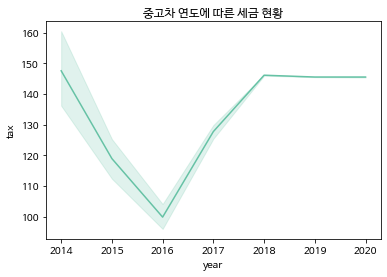

In [43]:
sns.lineplot(x = 'year', y = 'tax', data = audi)
plt.title('중고차 연도에 따른 세금 현황')
plt.show()

####2-7 연도별 가격 변화량
* 비교적 최근에 출시된 차량의 가격이 월등히 높습니다.
* 물가상승 등의 요인도 있겠지만, 개인적으로는 신기술 탑재, 주행거리등 많은 요인이 있을 것으로 생각됩니다.

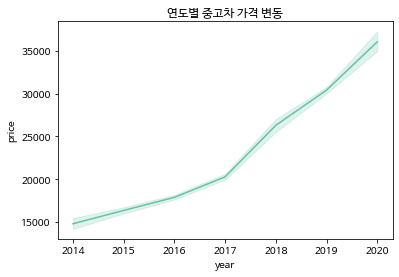

In [44]:
sns.lineplot(x = 'year', y ='price', data = audi)
plt.title ('연도별 중고차 가격 변동')
plt.show()

#### 2-8. 주행거리에 따른 가격을 비교한 산점도 그래프 생성
* 비교적 주행거리 많은 차량일수록 가격이 낮습니다.

In [45]:
fig = px.scatter(audi,
                 x= 'mileage',
                 y = 'price',
                 color = 'model')


# 1. 그래프 설정.
fig.update_layout(
    
    # 제목 설정
    title = dict(
        # <br> 태그와 <sup> 태그를 사용하여 subtitle을 지정할 수 있다.
        text = '<b>주행거리에 따른 가격을 비교한 산점도 </b><br><sup> Price comparison based on mileage</sup>',

        x = 0.5,
        y = 0.95,
        font = dict(
            size = 23,
            color = '#000000'
        )
    )
)
fig.show()

In [46]:
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,size_and_type,size,type,used_year,ampy,km/l
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,small_hatchback,small,hatchback,6,2622.5,23.8
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,subfull_sedan,subfull,sedan,7,5171.9,27.6
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,small_hatchback,small,hatchback,7,4278.0,23.8
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,mid_sedan,mid,sedan,6,4325.3,28.9
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,submid_hatchback,submid,hatchback,4,499.5,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,submid_hatchback,submid,hatchback,3,1339.3,21.3
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,submid_hatchback,submid,hatchback,3,659.3,21.3
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,submid_hatchback,submid,hatchback,3,203.0,21.3
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,submid_suv,submid,suv,6,1441.0,20.6


# **3. 모델 생성 : 가격 예측**

* target의 값은 price 입니다. 
* 데이터의 특성상, 우리는 `회귀`를 이용하여 모델을 생성하도록 합니다.

In [47]:
# 필요한 라이브러리를 가져옵니다.
from sklearn.model_selection import train_test_split

# train & test 분할.
train, test = train_test_split(audi, train_size = 0.8, test_size = 0.2, random_state = 42)

# trainw & val 분할.
train, val = train_test_split(train, train_size =0.7, test_size = 0.3, random_state= 42)

train.shape, val.shape, test.shape


# features & target 분할.
target = 'price'

# train
y_train = train[target]
X_train = train.drop(target, axis = 1)

# val
y_val = val[target]
X_val = val.drop(target, axis = 1)

# test
y_test = test[target]
X_test = test.drop(target, axis = 1)



#### 3-1. `PipeLine : RandomForestRegressor` 을 통한 가격 예측

In [48]:
audi.isnull().sum()

model            0
year             0
price            0
transmission     0
mileage          0
fuelType         0
tax              0
mpg              0
engineSize       0
size_and_type    0
size             0
type             1
used_year        0
ampy             0
km/l             0
dtype: int64

In [49]:
# 파이프라인을 생성합니다, 먼저 필요한 라이브러리를 가져옵니다.
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer


# 함수를 생성합니다.
def get_pipeline(**kwargs):
  return make_pipeline(
      OrdinalEncoder(handle_unknown = 'use_encoded_value',
                     unknown_value = 9182),
      SimpleImputer(),
      RandomForestRegressor(**kwargs),
)

# 파이프라인을 생성합니다.
pipe = get_pipeline(max_depth = 3,
                    n_jobs = -1)

# fit
pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=9182)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_jobs=-1))])

#### 3-1-1. 모델 성능 평가 진행.
* 데이터를 살펴볼 때, 평균치보다 큰 값들이 존재합니다.
  * 큰 오류값의 차이에 대하여, 크게 페널티를 주는 이점이 존재하는 `RMSE`를 사용합니다.
  

In [50]:
# 필요한 라이브러리를 가져옵니다. 사이킷런에서는 rmse를 지원하지 않으므로 직접 만들어야 합니다.
from sklearn.metrics import mean_squared_error

# 검증데이터로 진행합니다.  
# 아래 예측값을 만드는 과정중에 학습 데이터에 존재하지 않는 새 항목을 포함할 수 도 있다는 것을 알게 되었습니다. (값이 3개일 때 나눌때 쏠리는 현상)
# 위 파이프라인의 ordinalencoder에 존재하는 파라미터의 handle_unknown 및 unknown_value 를 수정하였습니다.


val_predict = pipe.predict(X_val)

MSE = mean_squared_error(y_val, val_predict)
rmse = np.sqrt(MSE)

훈련 에러 값은 다음과 같습니다.

In [51]:
print(f'검증값 에러: {rmse:.3f}')

검증값 에러: 5976.885


####3-1-2.오차 값을 실제 값의 퍼센트로 나타내어 봅시다.
* 데이터프레임을 생성합니다.
  * 데이터프레임은 <U>검증데이터의 예측값</U>인 `val_predict`와 <U>검증데이터의 타겟</U>인 `y_val`를 이용하여 생성합니다.
  * 오차 값을 실제 값의 퍼센트로 나타내어 봅시다.

* 오차값의 평균 또한 구해봅시다.

In [52]:
# 데이터 생성
result = pd.DataFrame({'pred_val': val_predict, 'real_val' : y_val})
result

# 오차를 실제 값의 퍼센트로 나타내어 봅시다.
result['ratio(%)'] = abs((result['pred_val'] - result['real_val']) / result['real_val']) * 100


# 평균 오차율은 다음과 같습니다. 
#print(f'오차값의 평균은 다음과 같습니다: {result['ratio(%)'].mean()}')
error_avg = result['ratio(%)'].mean()

print(f'오차값의 평균은 {error_avg}% 입니다.')


오차값의 평균은 15.570062484671686% 입니다.


3-1-3. 오차를 더욱더 줄여봅시다.
* `n_estimators`에 차이에 따른 결과를 비교해보도록 합니다.
  * 150, 200, 250 으로 지정하였습니다.



In [53]:
num = [10,50,150, 200, 250, 300]

for i in num:
  # 파이프라인을 생성할 때, i값을 넣어 생성합니다.
  pipe = get_pipeline(max_depth = 3,
                    n_jobs = -1,
                    n_estimators = i)
  
  # 학습
  pipe.fit(X_train, y_train)

  #검증 값 생성. (검증데이터 이용)
  y_pred = pipe.predict(X_val)

  percent = abs((y_pred - y_val) / y_val) * 100
  avg_percent = (np.mean(percent))
  print(f'{i}를 이용한 오차 퍼센트는 다음과 같습니다. : {avg_percent}%')


10를 이용한 오차 퍼센트는 다음과 같습니다. : 16.067791174836948%
50를 이용한 오차 퍼센트는 다음과 같습니다. : 15.786073683558884%
150를 이용한 오차 퍼센트는 다음과 같습니다. : 15.696339172743798%
200를 이용한 오차 퍼센트는 다음과 같습니다. : 15.69291527684752%
250를 이용한 오차 퍼센트는 다음과 같습니다. : 15.656403610687233%
300를 이용한 오차 퍼센트는 다음과 같습니다. : 15.646532108629584%


n_estimators를 조정하였으나, 큰 차이를 보여주지 않았습니다.


#### 3-2. 특성중요도 계산하기 : `Permutation Importance`

* 순열 중요도를 계산합니다
  * 순열 중요도의 상위 특성만 사용하여 모델을 학습하고, 평가지표를 구하도록 합니다.

* 모든 특성에 대하여 모델을 학습했을 때와 상위 특성만 사용하여 모델을 학습했을 때의 평가지표를 확인하도록 하겠습니다❗

`단점 : Permutation Importance`
* 강한 상관관계가 있는 특성이 존재한다면 잘못된 값을 낼 수 있습니다.
  * 결과적으로 해당 특성과 강력한 관계가 있는 특성은 </br>실제로 중요한 특성일 수 있음에도 낮은 `Permutation Importance`를 보일 수 있습니다.


In [54]:
# 필요한 라이브러리를 설치합니다.  
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
# column :  mpg & size_and_type을 모든 데이터셋에서 제거합니다. (연관이 존재할 가능성이 있음)
X_train = X_train.drop(['mpg', 'size_and_type'], axis = 1)
X_val = X_val.drop(['mpg', 'size_and_type'], axis = 1)
X_test = X_test.drop(['mpg', 'size_and_type'], axis = 1)

In [56]:
X_train.shape, X_val.shape, X_test.shape

((5233, 12), (2243, 12), (1869, 12))

In [57]:
pipe.named_steps

{'ordinalencoder': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9182),
 'simpleimputer': SimpleImputer(),
 'randomforestregressor': RandomForestRegressor(max_depth=3, n_estimators=300, n_jobs=-1)}

In [58]:
pipe[0]

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9182)

In [59]:
X_val.head()

,model,year,transmission,mileage,fuelType,tax,engineSize,size,type,used_year,ampy,km/l
1602,Q5,2016,Manual,23314,Petrol,240,2.0,mid,suv,7,3330.6,16.0
8422,Q7,2019,Automatic,12998,Diesel,150,3.0,subfull,suv,4,3249.5,14.1
9648,A5,2019,Automatic,2000,Diesel,145,2.0,mid,coupe,4,500.0,19.6
9750,Q3,2015,Manual,55000,Diesel,160,2.0,submid,suv,8,6875.0,21.3
1978,Q5,2017,Semi-Auto,17503,Petrol,145,3.0,mid,suv,6,2917.2,14.6


In [60]:
# 필요한 라이브러리를 불러옵니다. : eli5
import eli5
from eli5.sklearn import PermutationImportance


# 파이프라인을 생성합니다. (기존 정의한 함수를 이용합니다.)
pipe = get_pipeline(max_depth = 3,
                    n_jobs = -1,
                    n_estimators = 150, random_state = 42)



# 생성한 파이프라인으로  
pipe.fit(X_train, y_train)


# PermutationImportance를 생성합니다.
permuter = PermutationImportance(
    pipe.named_steps['randomforestregressor'],
    scoring = 'neg_root_mean_squared_error',
    n_iter= 10,
    random_state = 2)



# 검증 데이터를 이용하여 스코어를 다시 계산하도록 합니다, 검증 데이터에는 ordinalencoder를 적용합니다. 


X_val_preprocessed = pipe[0].transform(X_val)

# permuter.fit
permuter.fit(X_val_preprocessed, y_val)

PermutationImportance(estimator=RandomForestRegressor(max_depth=3,
                                                      n_estimators=150,
                                                      n_jobs=-1,
                                                      random_state=42),
                      n_iter=10, random_state=2,
                      scoring='neg_root_mean_squared_error')

Permutation Importance를 시각화하여 봅시다.

Text(0.5, 1.0, 'Permutation Importance')

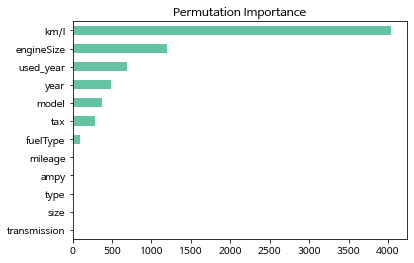

In [61]:
# feature_name 지정.
feature_names = X_val.columns.tolist()

# Series 생성.
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 시각화 생성.
pi.plot.barh()
plt.title('Permutation Importance')

In [62]:
# 특성별 score를 확인합니다. 
eli5.show_weights(
    permuter,
    top = None, # top이 None일 때 모든 특성
    feature_names = feature_names
)

Weight,Feature
4043.9658 ± 236.6566,km/l
1194.6116 ± 137.1092,engineSize
687.9713 ± 72.0711,used_year
488.7587 ± 60.4390,year
373.7804 ± 106.8400,model
288.8215 ± 37.8221,tax
100.2324 ± 29.3041,fuelType
4.3008 ± 2.0511,mileage
0.6781 ± 0.3975,ampy
0 ± 0.0000,type


 PI의 평균값 및 PI의 모든 값을 살펴봅시다.


In [63]:
print(f' Permutation Importance의 평균값: {pi.mean()}')
pi.round(3)

 Permutation Importance의 평균값: 598.5933907283735


transmission       0.000
size               0.000
type               0.000
ampy               0.678
mileage            4.301
fuelType         100.232
tax              288.822
model            373.780
year             488.759
used_year        687.971
engineSize      1194.612
km/l            4043.966
dtype: float64

#### Permutation Importance의 평균값보다 높은 값을 갖는 컬럼은 총 3가지 입니다,
`used_year, engineSize, km/l`

* 상위 특성만을 사용하여 모델을 학습했을 때의 평가지표와<br/>
  모든 특성에 대하여 모델을 학습했을 때의 평가지표를 비교하여 보겠습니다.
  * 또한 상위 특성만을 이용하는 것이 아닌 어느정도 높은 값을 가진 특성을 모두 사용했을 때의 값 또한 비교하여 보겠습니다.

#### 성능 평가 

모든 컬럼을 사용했을 경우는 다음과 같습니다.

In [64]:
# 필요한 라이브러리를 가져옵니다. 사이킷런에서는 rmse를 지원하지 않으므로 직접 만들어야 합니다.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# 검증데이터로 진행합니다.  
# 아래 예측값을 만드는 과정중에 학습 데이터에 존재하지 않는 새 항목을 포함할 수 도 있다는 것을 알게 되었습니다. (값이 3개일 때 나눌때 쏠리는 현상)
# 위 파이프라인의 ordinalencoder에 존재하는 파라미터의 handle_unknown 및 unknown_value 를 수정하였습니다.

val_predict = pipe.predict(X_val)

mse = mean_squared_error(y_val, val_predict)
rmse = np.sqrt(MSE)
msle = mean_squared_log_error(y_val, val_predict)
rmsle  = np.sqrt(msle)

print(f'RMSE의 값 : {round(rmse, 5)}')
print(f'MSE의 값 : {round(mse,5)}')
print(f'MSLE의 값 : {round(msle,5)}')
print(f'rmsle의 값 : {round(rmsle,5)}')

RMSE의 값 : 5976.88452
MSE의 값 : 36202090.47582
MSLE의 값 : 0.04176
rmsle의 값 : 0.20436


r2_score는 1에 가까울 수록 선형회귀 모델이 데이터에 대하여 높은 연관성을 지니고 설명합니다.</br>
현재 검증값과 검증데이터로 생성한 예측값으로 r2_score을 측정했을 때, 1에 거의 근접한 값을 보여줍니다.

In [65]:
# r2_score 또한 확인하여 봅시다. 
from sklearn.metrics import r2_score
print(round(r2_score(val_predict, y_val),5))

0.60368


상위 컬럼만 이용했을 때의 값 또한 살펴봅시다.
* 데이터를 새로 나누어야 합니다.
* 이후 데이터를 모델 및 PI(Permutation Importance)에 학습시키도록 합니다.

In [66]:
# 데이터를 새로 지정해야합니다, 평균보다 높은 값을 가진 컬럼으로 구성한 피처를 생성합니다.
pi_features = ['used_year','engineSize','km/l']

# 훈련
X_train_pi = X_train[pi_features]

# 검증
X_val_pi = X_val[pi_features]

# 테스트
X_test_pi =X_test[pi_features]


# 파이프라인을 생성합니다. 파라미터는 기존과 동일합니다.
pipe = get_pipeline(max_depth = 3,
                    n_jobs = -1,
                    n_estimators = 150, random_state = 42)

# 파이프라인을 학습시킵니다.
pipe.fit(X_train_pi, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=9182)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_estimators=150, n_jobs=-1,
                                       random_state=42))])

In [67]:
# permuter를 생성합니다,
permuter = PermutationImportance(
    
    # 모델 : 파이프라인의 랜덤포레스트 회귀를 이용합니다.
    pipe.named_steps['randomforestregressor'],

    # scoring : 위에서 봤듯이, MAE보다는 RMSE의 결과가 잘 나오는 것을 알 수 있습니다.
    n_iter = 10,
    random_state = 2)

# 검증 데이터를 이용하여 스코어를 다시 계산하도록 합니다, 검증 데이터에는 ordinalencoder를 적용합니다. 
X_val_preprocessed = pipe[0].transform(X_val_pi)

# permuter.fit
permuter.fit(X_val_preprocessed, y_val)

PermutationImportance(estimator=RandomForestRegressor(max_depth=3,
                                                      n_estimators=150,
                                                      n_jobs=-1,
                                                      random_state=42),
                      n_iter=10, random_state=2)

Text(0.5, 1.0, 'Permutation Importance')

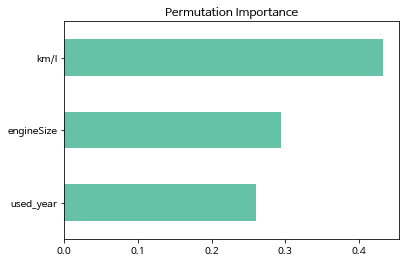

In [68]:
# 인덱스 데이터 타입을 리스트 형태로 변경합니다.
feature_names = X_val_pi.columns.tolist()

# 피처의 이름 및 값을 시리즈 형태로 표현합니다. -> permuter에 접근, 피처 중요도를 가져옵니다.
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()

plt.title('Permutation Importance')

In [69]:
pi

used_year     0.260135
engineSize    0.294159
km/l          0.432570
dtype: float64

상위 피처만을 이용했을 때의 성능은 다음과 같습니다.

In [70]:
# 검증 데이터를 생성합니다.
val_predict = pipe.predict(X_val_pi)

mse = mean_squared_error(y_val, val_predict)
rmse = np.sqrt(MSE)
msle = mean_squared_log_error(y_val, val_predict)
rmsle  = np.sqrt(msle)


print(f'RMSE의 값 : {round(rmse, 5)}')
print(f'MSE의 값 : {round(mse,5)}')
print(f'MSLE의 값 : {round(msle,5)}')
print(f'rmsle의 값 : {round(rmsle,5)}')



RMSE의 값 : 5976.88452
MSE의 값 : 36333143.88148
MSLE의 값 : 0.04315
rmsle의 값 : 0.20774


In [71]:
# r2_score 또한 확인하여 봅시다. 
print(round(r2_score(val_predict, y_val),5))

0.58904


#### 중요특성만 사용했을 경우 및 모든 특성을 사용했을 경우의 차이는 다음과 같습니다.

* 오히려 MSE의 값이 높아졌습니다, 하지만 RMSE의 값의 차이는 존재하지 않습니다
* MSLE 및 RMSLE의 값 또한 모두 상승하였습니다.
* 이번에는 pi에서 적은 값을 제외한 나머지 컬럼만을 이용하여 성능평가를 진행해보도록 합시다.(컬럼추가)

In [72]:
# aim 
pi_features = ['fuelType', 'tax', 'model', 'year', 'used_year', 'engineSize', 'km/l']


# adoped
X_train_pi = X_train[pi_features]
X_val_pi = X_val[pi_features]
X_test_pi = X_test[pi_features]


# pipline
pipe = get_pipeline(max_depth = 3,
                    n_jobs = -1,
                    n_estimators = 150, random_state = 42)

#fit.
pipe.fit(X_train_pi, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=9182)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_estimators=150, n_jobs=-1,
                                       random_state=42))])

In [73]:
val_predict = pipe.predict(X_val_pi)

mse = mean_squared_error(y_val, val_predict)
rmse = np.sqrt(MSE)
msle = mean_squared_log_error(y_val, val_predict)
rmsle  = np.sqrt(msle)

print(f'RMSE의 값 : {round(rmse, 5)}')
print(f'MSE의 값 : {round(mse,5)}')
print(f'MSLE의 값 : {round(msle,5)}')
print(f'rmsle의 값 : {round(rmsle,5)}')

RMSE의 값 : 5976.88452
MSE의 값 : 36227981.90392
MSLE의 값 : 0.04179
rmsle의 값 : 0.20443


In [74]:
# r2_score 또한 확인하여 봅시다. 
print(round(r2_score(val_predict, y_val),5))

0.605


#### 모든 특성 vs 중요한 특성만 vs 기댓값이 높은 특성 
> 각기 다른 성능지표에서 천차만별의 값을 보여주고 있습니다.

* R2_Score로 살펴보았을 때, 1에 가까운 특성은 기댓값이 높은특성입니다. (pi값이 
적은컬럼을 제외한 모델)
  * 이 모델의 MSE는 모든특성을 이용했을 때보다 값이 높으나, 다른 지표에서는 큰 차이가 없고, </br>R2_score가 높아 셋중 가장 좋은 성능을 내고 있다고 생각합니다.


####❗❗ Permutation Importance로 상위특성만 사용하였을 때 평가지표가 좋지 않습니다.
* PI는 강한 상관관계를 갖는 특성이 존재한다면

In [75]:
X_train.shape, X_val.shape

((5233, 12), (2243, 12))

#### 타 모델을 생성하여 기존 모델과의 성능을 비교하여 봅시다.

* 이번에는 XGBoost의 회귀모델을 이용하겠습니다.
* 먼저 `XGBRegressor : glinear` 타입을 생성한 모델의 값은 다음과 같습니다.

[다음글 참조 : XGBoost earlystopping](https://mljar.com/blog/xgboost-early-stopping/)

In [76]:
# 필요한 라이브러리를 설치합니다. xgboost
!pip install xgboost==1.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
# 필요한 라이브러리 가져오기
from category_encoders import OrdinalEncoder
from xgboost import XGBRegressor

# 필요한 인스턴스 객체 생성 : 인코더 및 모델 
enc = OrdinalEncoder()
model = XGBRegressor(n_estimators = 200,
                     booster ='gblinear',
                   learning_rate=0.08, 
                   gamma=0,
                   objective = 'reg:squaredlogerror', 
                   subsample=0.75,
                   colsample_bytree=1, 
                   max_depth=7,
                   early_stopping_rounds=20)

# 훈련데이터 : fit_transform
X_train_encoded = enc.fit_transform(X_train, y_train)

# 검증데이터 : transform
X_val_encoded = enc.transform(X_val)

# eval_set 생성. 
eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

# fit.
model.fit(X_train_encoded, y_train,
          eval_set = eval_set)

[09:55:18] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "subsample" } are not used.

[0]	validation_0-rmsle:9.18836	validation_1-rmsle:9.19034
[1]	validation_0-rmsle:8.75107	validation_1-rmsle:8.75171
[2]	validation_0-rmsle:8.31122	validation_1-rmsle:8.31101
[3]	validation_0-rmsle:7.87211	validation_1-rmsle:7.87134
[4]	validation_0-rmsle:7.44221	validation_1-rmsle:7.44099
[5]	validation_0-rmsle:7.01451	validation_1-rmsle:7.01299
[6]	validation_0-rmsle:6.58195	validation_1-rmsle:6.58031
[7]	validation_0-rmsle:6.15167	validation_1-rmsle:6.14993
[8]	validation_0-rmsle:5.72551	validation_1-rmsle:5.72369
[9]	validation_0-rmsle:5.30318	validation_1-rmsle:5.30129
[10]	validation_0-rmsle:4.88519	validation_1-rmsle:4.88323
[11]	validation_0-rmsle:4.47244	validation_1-rmsle:4.47043
[12]	validation_0-rmsle:4.06690	validation_1-rmsle:4.06478
[13]	validation_0-rmsle:3.66612	validation_1-rmsle:3.66392
[14]	validation_0-rmsle:3.27379	validation_1-rmsle:3.27

XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=20, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=0, num_parallel_tree=None,
             objective='reg:squaredlogerror', predictor=None, ...)

In [78]:
print(f'기울기 : {model.coef_}')
print(f'y절편 : {model.intercept_}')

기울기 : [2.15857e+02 7.60777e-01 5.70438e+02 1.96660e-02 6.07730e+02 6.74728e+00
 7.75932e+02 4.92291e+02 4.05131e+02 1.59408e+02 1.27695e-01 3.80853e+01]
y절편 : [1885.2]


In [79]:
val_predict = model.predict(X_val_encoded)

mse = mean_squared_error(val_predict,y_val)
rmse = np.sqrt(MSE)

msle = mean_squared_log_error(y_val, val_predict)
rmsle  = np.sqrt(msle)


print(f'RMSE의 값 : {round(rmse, 5)}')
print(f'MSE의 값 : {round(mse,5)}')
print(f'MSLE의 값 : {round(msle,5)}')
print(f'rmsle의 값 : {round(rmsle,5)}')

RMSE의 값 : 5976.88452
MSE의 값 : 226980632.73906
MSLE의 값 : 0.40604
rmsle의 값 : 0.63721


In [80]:
# XGB model의 score를 계산하여 봅시다,
from sklearn.metrics import r2_score
print(round(r2_score(val_predict, y_val),5))

-35.77726


In [81]:
# XGBoost는 앙상블에 기반한 모델입니다, 하지만  현재는 회귀를 이용하여 생성되었습니다.
# 따라서 최적의 트리수는 확인할 수 없습니다.
model.best_ntree_limit

0

#### XGBRegressor를 회귀 모델로 이용하였을 때 성능지표는 좋아보이지 않습니다.

* 4가지 성능 지표는 다른 모델과는 다르게 높은 값을 보여줍니다.(4가지 성능지표는 낮을 수록 좋습니다)
* R2_score 값은 1에 가까울 수록 좋습니다.(하지만 R2_score 값은 **nagative**한 값을 보여주고 있습니다.)
* 또한 최적의 트리수를 확인할 수 없습니다. (회귀를 이용하여 모델을 생성하였기 때문입니다.)

#### XGBRegressor를 다시 트리타입으로 모델을 생성하여 봅시다.
* booster의 값을 기본값으로 변경합니다. `booster = gtree`


In [82]:
# 필요한 인스턴스 객체 생성 : 인코더 및 모델 
enc = OrdinalEncoder()

# 모델 생성
model = XGBRegressor(n_estimators = 200,
                     booster ='gbtree',
                   learning_rate=0.08, 
                   gamma=0,
                   objective = 'reg:squarederror', 
                   subsample=0.75,
                   colsample_bytree=1, 
                   max_depth=7,
                   early_stopping_rounds=20)


# 훈련데이터 : fit_transform
X_train_encoded = enc.fit_transform(X_train, y_train)

# 검증데이터 : transform
X_val_encoded = enc.transform(X_val)

# eval_set 생성. 
eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

# fit.
model.fit(X_train_encoded, y_train,
          eval_set = eval_set)

[0]	validation_0-rmse:25029.53224	validation_1-rmse:24806.75021
[1]	validation_0-rmse:23109.81119	validation_1-rmse:22897.53076
[2]	validation_0-rmse:21331.29495	validation_1-rmse:21141.98571
[3]	validation_0-rmse:19705.78989	validation_1-rmse:19513.21589
[4]	validation_0-rmse:18214.69558	validation_1-rmse:18012.86045
[5]	validation_0-rmse:16829.78867	validation_1-rmse:16629.09422
[6]	validation_0-rmse:15556.11293	validation_1-rmse:15360.59995
[7]	validation_0-rmse:14385.09540	validation_1-rmse:14208.43954
[8]	validation_0-rmse:13309.72438	validation_1-rmse:13143.92350
[9]	validation_0-rmse:12320.22261	validation_1-rmse:12154.27560
[10]	validation_0-rmse:11410.57165	validation_1-rmse:11260.08794
[11]	validation_0-rmse:10570.30094	validation_1-rmse:10437.07526
[12]	validation_0-rmse:9809.90356	validation_1-rmse:9685.90322
[13]	validation_0-rmse:9106.60972	validation_1-rmse:8994.04725
[14]	validation_0-rmse:8455.29579	validation_1-rmse:8348.05091
[15]	validation_0-rmse:7860.24614	validat

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=20, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

**XGB모델의 트리생성의 설정은 200으로 맞춰놨습니다.**</br>
하지만 현재 모델의 파리미터 `booster`의 값은 `glinear`이므로 트리의 개수가 나오지 않습니다.(앙상블 모델로 생성되지 않았기 때문) </br>
* `parameter = objective`의 값을 기본으로 변경합니다. => `reg:squarederror`
* `parameter  = booster`의 값을 변경합니다. => `reg:squarederror (basic option)` 
* `booster = gtree(basic)`라면 최적의 트리수는 100개입니다.

In [83]:
model.best_ntree_limit

100

이후 생성된 모델의 성능을 확인하여 봅시다. (성능지표)

In [84]:
val_predict = model.predict(X_val_encoded)

mse = mean_squared_error(val_predict,y_val)
rmse = np.sqrt(MSE)
msle = mean_squared_log_error(y_val, val_predict)
rmsle  = np.sqrt(msle)



print(f'RMSE의 값 : {round(rmse, 5)}')
print(f'MSE의 값 : {round(mse,5)}')
print(f'MSLE의 값 : {round(msle,5)}')
print(f'rmsle의 값 : {round(rmsle,5)}')
print(f'R2_Score의 값 : {round(r2_score(val_predict, y_val),5)}')


RMSE의 값 : 5976.88452
MSE의 값 : 5451902.66197
MSLE의 값 : 0.00811
rmsle의 값 : 0.09004
R2_Score의 값 : 0.95537


In [85]:
results = model.evals_result()
results

{'validation_0': OrderedDict([('rmse',
               [25029.53224034474,
                23109.81119448357,
                21331.294954495766,
                19705.789894542613,
                18214.695580560492,
                16829.78866862036,
                15556.11292949359,
                14385.09540192495,
                13309.724376580163,
                12320.222611445048,
                11410.571651724158,
                10570.300937198885,
                9809.90356184569,
                9106.609722147148,
                8455.29579465791,
                7860.246138597048,
                7312.170272828329,
                6811.603674037891,
                6352.085257651526,
                5930.88179073181,
                5548.090955691838,
                5201.086790606163,
                4875.464743845263,
                4581.135942627133,
                4308.2106287668075,
                4064.0089952379794,
                3842.641931742885,
          

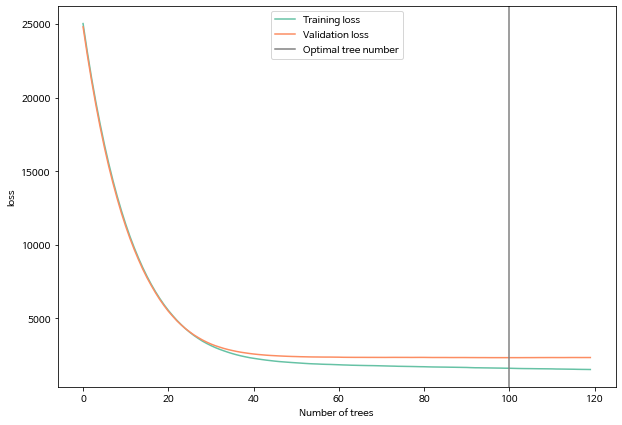

In [86]:
# 훈련 손실 및 검증데이터의 손실을 시각화하여 봅니다.
plt.figure(figsize=(10,7))
plt.plot(results['validation_0']['rmse'], label = 'Training loss')
plt.plot(results['validation_1']['rmse'], label = 'Validation loss')



#최적의 트리를 표기합니다.
plt.axvline(100, color = 'gray', label = 'Optimal tree number')

# 라벨 이름을 정의합니다.
plt.xlabel('Number of trees')
plt.ylabel('loss')
plt.legend()

#### **성능지표를 통해 알아본 가장 좋은 성능을 뽑아내는 모델**
> `XGB model`이 현재 모델중에 가장 우수한 성능을 뽑아내고 있습니다.

* `parameter = objective`의 값이 `glinear` 선형모델이라면 성능이 좋지 않습니다.
* `objective = glinear` 일 경우 R2_score 또한 준수한 성능을 내고 있습니다.
  * 1에 가까운 지표를 보여줍니다, 1에 가까울 수록 높은 연관성을 지니고 있다고 설명합니다.

# **4. ICE Plot**
> 특정 관측치(데이터 포인트)에서의 **특정 특성**의 변화에 따른 모델의 예측 양상변화를 확인할 수 있습니다.

* 특정행의 데이터셋에서 분석을 진행합니다.

In [87]:
X_val.iloc[[3]]

,model,year,transmission,mileage,fuelType,tax,engineSize,size,type,used_year,ampy,km/l
9750,Q3,2015,Manual,55000,Diesel,160,2.0,submid,suv,8,6875.0,21.3


위와 같은 통계 정보를 갖는 사람에 대하여 'km/l'이 바뀔수록 모델이 예측을 어떻게 하는지 살펴봅시다.

In [88]:
#   를 확인하고자 하는 데이터를 가져오도록 합니다. 하나의 행을 가져옵니다. 
# 인코딩이 적용된 데이터로 진행합니다. 
one_datapoint = X_val_encoded.iloc[[3]].copy()

# 세 번째 데이터의 age 값을 데이터셋에 존재하는 최소 나이에서 최대 나이까지의 age값으로 변경합니다.
# km/l의 값은 소수가 섞여있으므로 np.arange를 이용합니다
# 하단에서 IndexError가 일어날 수 있으므로, 데이터의 값을 정수로 바꿔줍니다.
km_test_range = range(int(X_val_encoded['km/l'].min()), int(X_val_encoded['km/l'].max()+1))
result = []

for km in km_test_range:
  one_datapoint = X_val_encoded.iloc[[3]].copy()
  one_datapoint.iat[0,11] = km

  # 어레이타입의 값을 벗겨냅니다.  -> 값하나하나당 리스트로 변경됩니다.
  one_datapoint = model.predict(one_datapoint).tolist()

  # 빈 리스트에 우리가 위에서 작성한 리스트를 넣어줍니다.
  result.append(one_datapoint)


# 2차원 리스트를 1차원으로 flat해줍니다. -> 펴줍시다.
result = sum(result,[])
result

# array 배열을 생성합니다. 
results = np.array(result)
results

# km/l 값이 최소일 때  예측 확률로부터의 변화값을 볼 것입니다.
# 최소 값을 각 값에서 다 빼준다면 높은 km/l 값을 가질때 얼마나 값이 변화하는지 알 수 있습니다.
results -=  result[0]

Text(0, 0.5, '$\\Delta$ predict')

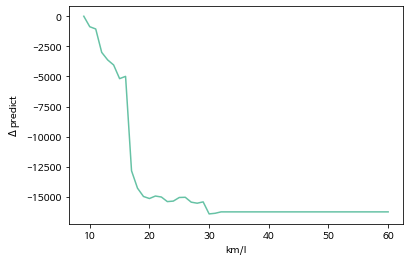

In [89]:
# 값이 얼마나 변화하였는지 시각화를 진행합니다.


# 음수를 표기할 수 있게 설정을 변경합니다
plt.rcParams['axes.unicode_minus'] = False

plt.plot(km_test_range, results)
plt.xlabel('km/l')
plt.ylabel("$\Delta$ predict")

* 위 정보를 비추어봤을 때, 자동차의 가격은 'km/l'가 높아질 수록 가격이 낮아질 것으로 예측됩니다.
* 다른 특성을 갖는 자동차들도 위와 같이 분석하는지 확인하여 봅시다. 
  * 변경될 타겟 특성은 그대로 `km/l`을 이용합니다.
  * 위에서 살펴본 차종은 **'Q3'** 였습니다. 다른 차종또한 확인하여 봅시다.
  

#### 4-1 다른 특성(구간)에서의 ICE Plot

In [90]:
# 인코딩 되기 전의 값은 다음과 같습니다.
X_val.iloc[[17,43,61,94,117]]

,model,year,transmission,mileage,fuelType,tax,engineSize,size,type,used_year,ampy,km/l
1604,A5,2015,Manual,37026,Petrol,145,1.8,mid,coupe,8,4628.2,21.3
3816,Q3,2020,Semi-Auto,4500,Petrol,145,1.5,submid,suv,3,1500.0,16.9
5719,A6,2016,Semi-Auto,38367,Diesel,30,2.0,subfull,sedan,7,5481.0,26.4
4978,A4,2017,Semi-Auto,15900,Petrol,150,2.0,mid,sedan,6,2650.0,21.7
3381,Q2,2019,Manual,4040,Diesel,145,1.6,small,suv,4,1010.0,21.3


In [91]:
# ordinal_encoding된 데이터의 값은 다음과 같습니다.
idx = [17,43,61,94,117]
scan_data = X_val_encoded.iloc[idx].copy()
scan_data

,model,year,transmission,mileage,fuelType,tax,engineSize,size,type,used_year,ampy,km/l
1604,6.0,2015,1,37026,1,145,1.8,3,4,8,4628.2,21.3
3816,5.0,2020,3,4500,1,145,1.5,2,2,3,1500.0,16.9
5719,10.0,2016,3,38367,2,30,2.0,4,3,7,5481.0,26.4
4978,4.0,2017,3,15900,1,150,2.0,3,3,6,2650.0,21.7
3381,2.0,2019,1,4040,2,145,1.6,1,2,4,1010.0,21.3


In [92]:
# 17,43,61,94,117 행에 대해서 살펴볼 것 입니다, 또한  피처의 범위 또한 그대로 이용합니다.
target_range = range(int(X_val_encoded['km/l'].min()), int(X_val_encoded['km/l'].max()+1))


def make_ice_plot(data, idx, target, target_feature_range):
  
  # 입력한 idx에 대한 데이터를 볼 수 있게 데이터를 따로 생성합니다.
  scan_data = data.iloc[[idx]].copy()


  # 결과 값을 담을 리스트 생성
  results =[]
  


  for value in target_feature_range:

    # 이 값은 타겟 : 'km/l'의 값이 될 것입니다.
    scan_data[target] = value


    # 위에서 지정한 값을 이용하여 예측하여 봅시다, 예측값을 먼저 펴주고,
    pred = model.predict(scan_data).tolist() 
  
    results.append(pred)

  # 여기서 다시 array를 생성합니다.
  results = np.array(results)
  
  return target_feature_range, results - results[0]  


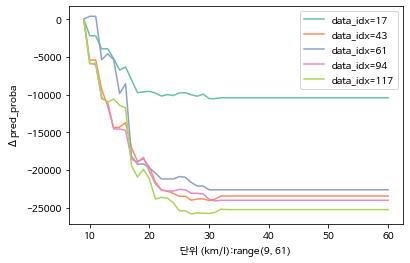

In [93]:
# 타겟 및 타겟의 범위를 지정하여줍니다.
target = 'km/l'
target_feature_range = range(int(X_val_encoded['km/l'].min()), int(X_val_encoded['km/l'].max()+1))

# 우리가 살펴볼 행은 총 5개며 다음과 같습니다.
for idx in [17,43,61,94,117]:

  #plot을 생성합니다.
  plt.plot(*make_ice_plot(X_val_encoded, idx, target, target_feature_range),
           
           #쉽게 확인할 수 있도록 라벨을 생성합니다.
           label=f"data_idx={idx}")

plt.xlabel(f'단위 (km/l):{target_feature_range}')
plt.ylabel("$\Delta$ pred_proba")
plt.legend()


> 전반적으로 `km/l` 값이 높을 수록 차량의 값이 많이 떨어진다는 것을 알 수 있습니다. 

* 살펴볼 점
  * `idx :43`은 앞서 살펴본 차량과 같은 모델이나, 차의 연식과 변속기 등이 다릅니다. <br/>
  허나 `km/l`는 이러한 옵션과 상관없이 늘어날 수록 가격이 계속해서 낮아집니다.

In [94]:
idx = [17,43,61,94,117]
scan_data = X_val_encoded.iloc[idx].copy()
scan_data 

,model,year,transmission,mileage,fuelType,tax,engineSize,size,type,used_year,ampy,km/l
1604,6.0,2015,1,37026,1,145,1.8,3,4,8,4628.2,21.3
3816,5.0,2020,3,4500,1,145,1.5,2,2,3,1500.0,16.9
5719,10.0,2016,3,38367,2,30,2.0,4,3,7,5481.0,26.4
4978,4.0,2017,3,15900,1,150,2.0,3,3,6,2650.0,21.7
3381,2.0,2019,1,4040,2,145,1.6,1,2,4,1010.0,21.3


# 5. PDP plot.
> 사람들은 평균적으로 모델이 특정 피처에 따라 타겟 값을 어떻게 예측하는지 궁금해합니다.

* ICE Plot으로 특정 데이터에 관하여 특정 피처의 변화에 따른 모델의 예측 양상을 살펴볼 수 있었습니다.
* 하나의 ICE Plot으로는 모델이 해당 특성에 대하여 어떻게 분석하고 이해하는지 알 수 없습니다.
  * 여러 세세한 조건에서의 모델의 예측 변화를 확인하긴 어렵지만, PDP를 통해 전반적인 모델의 해당 특성에 대한 이해방식을 확인할 수 있습니다.
  * **PDP는 입력 데이터들에 대하여 ICE plot의 평균으로 값을 구할 수 있습니다.**

**❗PDP plot 특정 특성의 대한 모델의 복잡한 반응 양상을 이해하기 쉽게 시각화 해준다는 장점이 존재합니다.**

#### 5-1 하나의 특성에 대하여 PDP plot을 생성합니다.

In [95]:
# 작업에 걸리는 시간을 확인합니다, 필요한 라이브러리를 가져옵니다.
from tqdm import tqdm


# 피처와 범위는 위에서 진행한 것과 같게 합니다.
target_feature = 'km/l'
target_feature_range = range(int(X_val_encoded['km/l'].min()), int(X_val_encoded['km/l'].max()+1))


# 결과값을 모을 빈 데이터를 작성합니다.
all_ice_plot = []


# 모든 검증데이터에 대하여, 위에서 작성한 함수로 ICE plot 데이터를 계산합니다.
for idx in tqdm(range(len(X_val_encoded))):
  all_ice_plot.append(
      make_ice_plot(X_val_encoded, idx, target_feature, target_feature_range)[1]
  )  

100%|██████████| 2243/2243 [09:27<00:00,  3.96it/s]


all_ice_plot_data.shape:(2243, 52, 1)
pdp_data.shape :(52, 1)


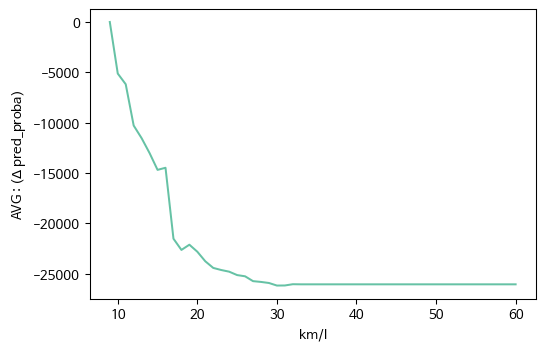

In [96]:
# 위에서 저장한 리스트 데이터를 벡터화합니다.
all_ice_plot_data = np.array(all_ice_plot)

print(f'all_ice_plot_data.shape:{all_ice_plot_data.shape}')

# 6033개의 ICE plot data를 0번째(data index) 축으로 평균을 내어봅니다.
pdp_data = all_ice_plot_data.mean(0)

# 차원의 모습은 다음과 같습니다.
print(f'pdp_data.shape :{pdp_data.shape}')

# dpi(dots per inch)수치를 조정하여 이미지 화질을 조정할 수 있습니다.
plt.rcParams['figure.dpi'] = 96

# PDP(평균 ICE plot) data를 시각화합니다.
plt.plot(target_feature_range, pdp_data)

#label 정리
plt.xlabel(target_feature)
plt.ylabel('AVG : ($\Delta$ pred_proba)')
plt.show()

**INSIGHT : 모델 시각화 결과**<br/>
중고차의 가격은 키로수가 높아질수록 중고차의 가격이 크게 떨어지기 시작합니다.
  

#### 5-2. 2개의 특성을 이용하여 PDP plot을 생성합니다.
* `PDPbox libarary`의 `pdp_isolate`를 사용한다면 하나의 특성에 대하여 pdp를 시각화할 수 있습니다.
* 2특성 변화에 대한 PDP는 heatmap 형태로 시각화할 수 있습니다.

In [104]:
# 필요한 라이브러리를 설치합니다.
!pip install wheel setuptools pip --upgrade


#!pip install -U setuptools
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758205 sha256=69a6af76e60236d4799a9337736fa739594d6641f6f3e4ac0d5231619aa60a34
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=12091624 sha256=fa2e82f6f248b0b29b72a1fa8993461692c0009dfb1bc61ea91923d5b1a830de
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe

In [107]:
# 필요한 라이브러리를 가져옵니다.
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# 살펴볼 feature 를 지정합니다.
target_features = ['tax', 'km/l']

# 필요한 인스턴스 객체를 생성합니다.
interaction = pdp_interact(
    
    # 사용할 모델을 지정합니다.
    model = model,

    # 사용할 데이터셋을 지정합니다.
    dataset = X_val_encoded, 

    # 모델의 피처는 사용한 데이터셋의 컬럼을 넣어둡니다.
    model_features = X_val_encoded.columns,

    # 살펴볼 특성을 features로 집어넣습니다.
    features = target_features)

(<Figure size 720x912 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb31463790>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fcb31412670>})

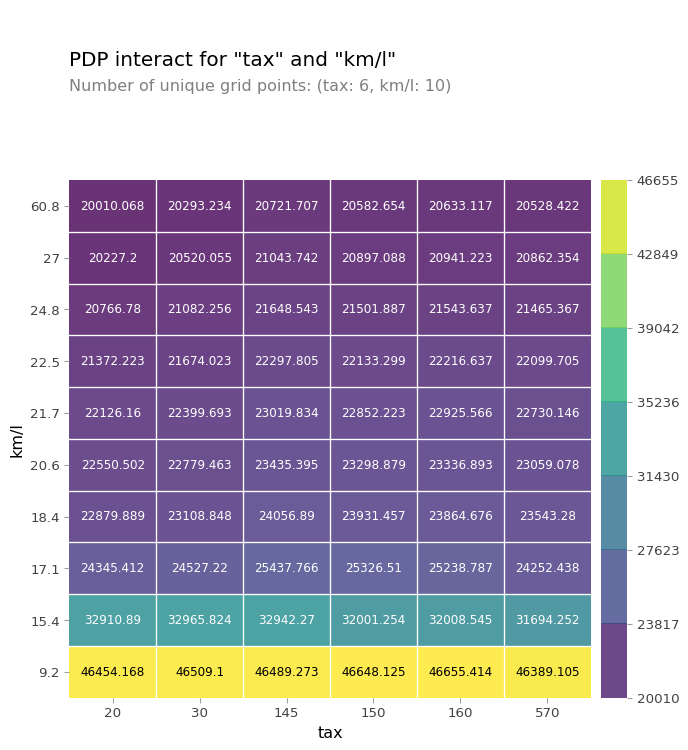

In [109]:
# 위에서 생성한 interaction에 대하여 plot을 생성합니다.

pdp_interact_plot(
    interaction,

    # 격자형태로 살펴볼 수 있다.(2특성을 살펴볼 경우)
    plot_type = 'grid',

    # 타겟으로 살펴볼 feature를 집어넣습니다.
    feature_names = target_features)


####5-3 PDP plot : 3D타입 시각화

위의 결과값을 데이터프레임으로 뽑아내면 다음과 같습니다

In [112]:
interaction.pdp.head(5)

,tax,km/l,preds
0,20.0,9.2,46454.167969
1,20.0,15.4,32910.890625
2,20.0,17.1,24345.412109
3,20.0,18.4,22879.888672
4,20.0,20.6,22550.501953


In [114]:
target_features[0]

'tax'